In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [29]:
fold_df = pd.read_csv('archive/Folds.csv')
fold_df.head()

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [30]:
img_path = "./BreaKHis_v1/"
classes = ["benign","malign"]

fold_df = fold_df.rename(columns = {"filename":"path"})
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [31]:
os.makedirs("Cancer/")

In [32]:
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [34]:
for p in fold_df['path']:
    src = "archive/BreaKHis_v1/" + p
    dest = "Cancer/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest,src.split("/")[5]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)

In [35]:
len(os.listdir("Cancer/"))

7909

In [36]:
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']
fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)
fold_df.head()

,fold,mag,grp,path,filename,label,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,benign_SOB_B_A-14-22549AB-100-003.png,0
3,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-004.png,benign,benign_SOB_B_A-14-22549AB-100-004.png,0
4,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-005.png,benign,benign_SOB_B_A-14-22549AB-100-005.png,0


/Users/celestiq/tensorflow-ml/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


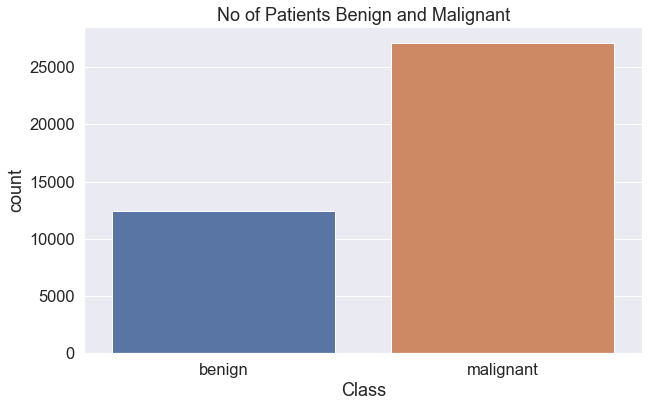

In [37]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(fold_df['label']);
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

In [38]:
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

In [39]:
benign_df.iloc[0]

fold                                                        1
mag                                                       100
grp                                                     train
path        BreaKHis_v1/histology_slides/breast/benign/SOB...
filename                       SOB_B_A-14-22549AB-100-001.png
label                                                  benign
file_loc                benign_SOB_B_A-14-22549AB-100-001.png
class                                                       0
Name: 0, dtype: object

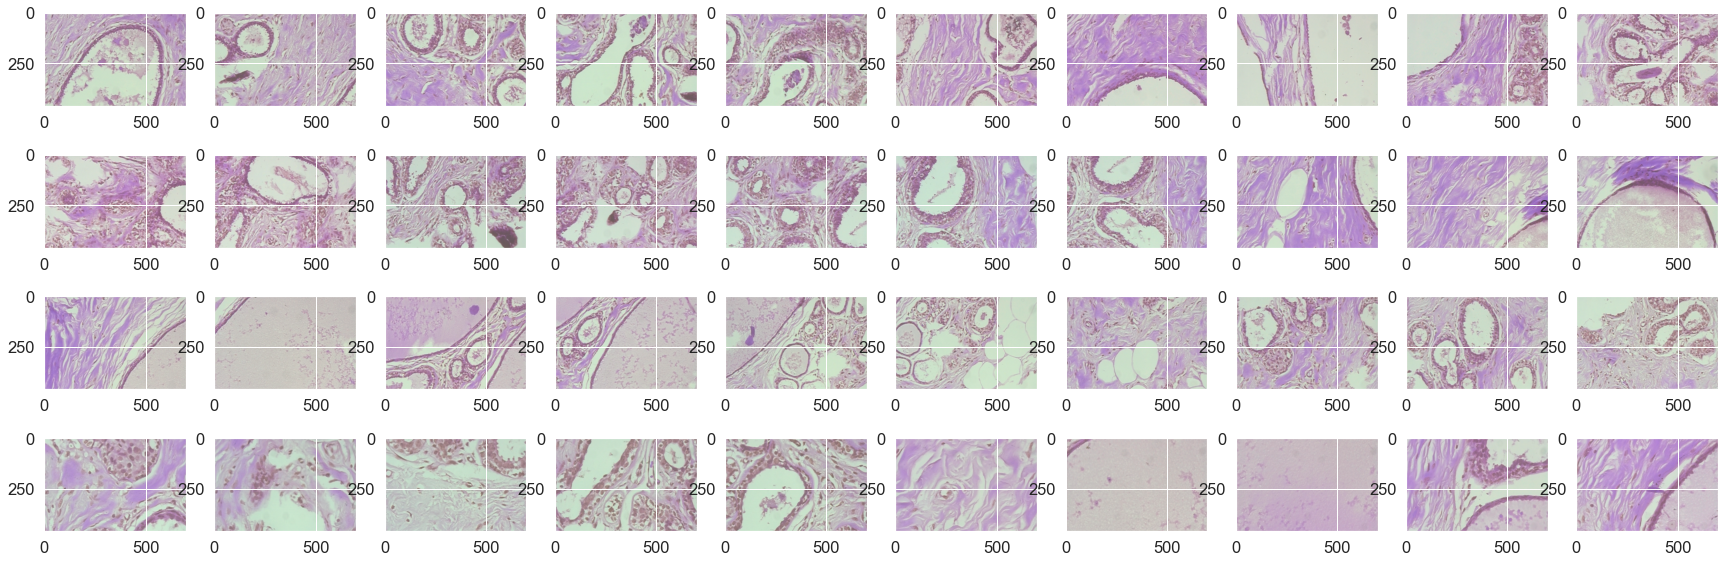

In [40]:
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("Cancer/"+ benign_df['file_loc'][i],1)
    plt.imshow(img)

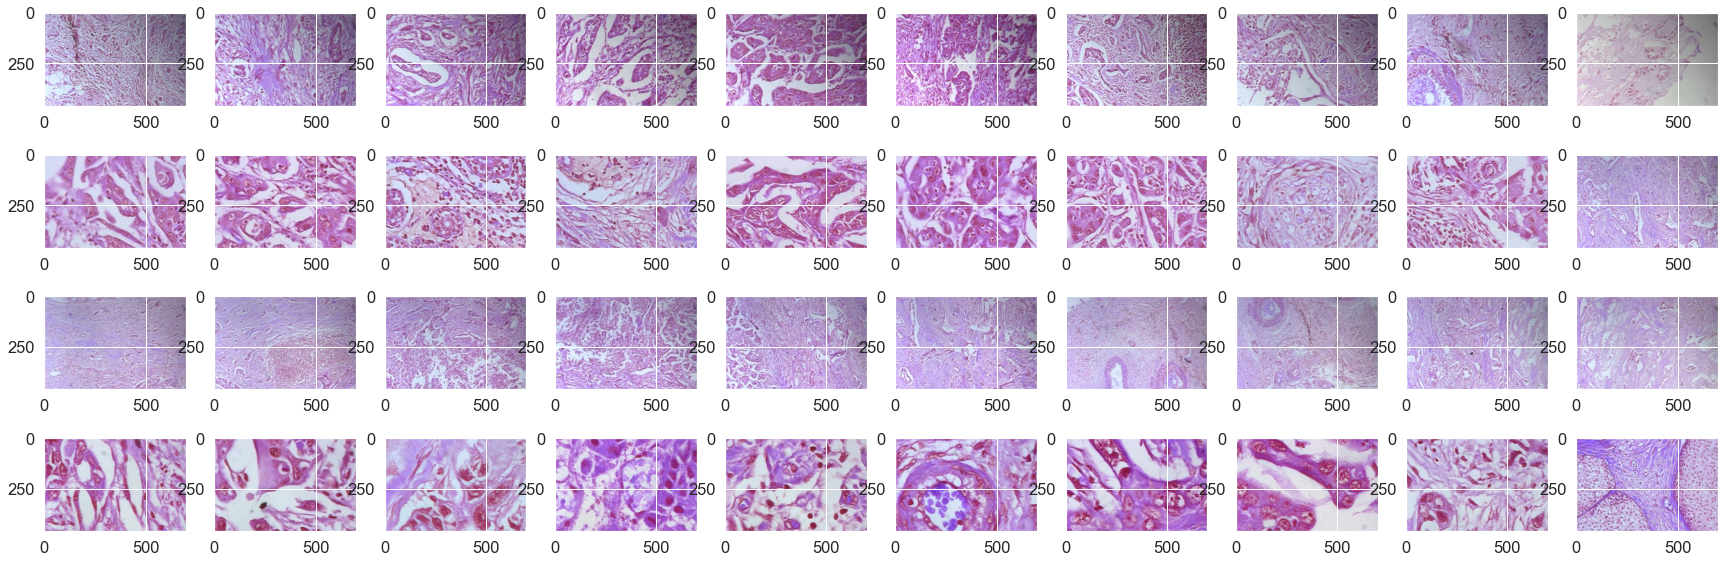

In [42]:
images = malignant_df['file_loc'].values
plt.figure(figsize = (30,10))
for i in range(0,40):
    plt.subplot(4,10,i+1)
    img = cv2.imread("Cancer/"+ images[i],1)
    plt.imshow(img)

In [43]:
df = pd.DataFrame(os.listdir("Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df.set_index("file_loc",inplace=True)

In [45]:
#Performing the splitting
data_train_and_val, data_test = train_test_split(df, test_size = 0.1, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.1, random_state = 47)

In [46]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6406, 2)
Validation size : (712, 2)
Testing size : (791, 2)


/Users/celestiq/tensorflow-ml/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/celestiq/tensorflow-ml/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/celestiq/tensorflow-ml/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

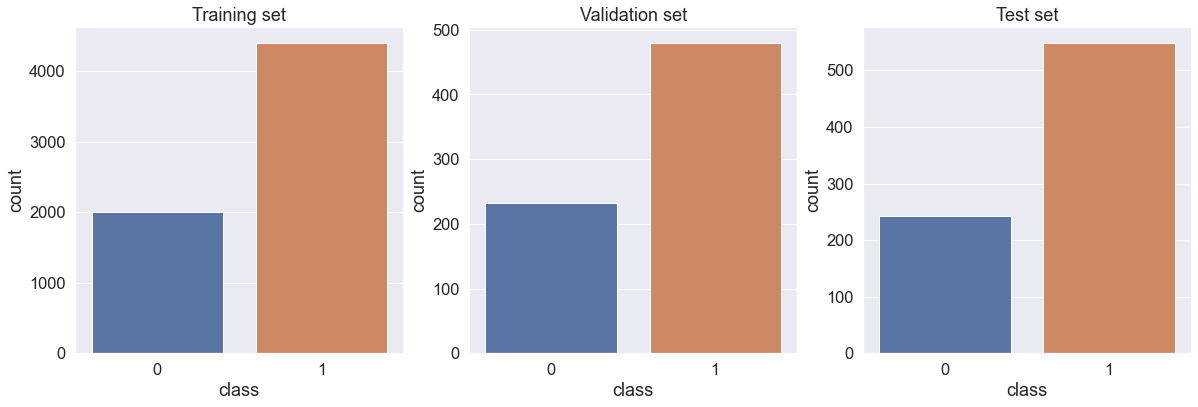

In [47]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(data_train['class'])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(data_test['class']);
plt.title("Test set");

In [49]:
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

train_has_cancer.shape, train_has_no_cancer.shape

((4400, 2), (2006, 2))

In [50]:
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), random_state = 47, replace = True)

In [51]:
data_train = pd.concat([train_has_cancer,train_has_no_cancer_upsample])

In [55]:
data_train.head()

,label,class
file_loc,,
malignant_SOB_M_DC-14-13412-200-015.png,malignant,1
malignant_SOB_M_PC-14-12465-400-011.png,malignant,1
malignant_SOB_M_DC-14-2980-100-009.png,malignant,1
malignant_SOB_M_DC-14-2773-100-002.png,malignant,1
malignant_SOB_M_DC-14-9461-200-044.png,malignant,1


In [54]:
os.makedirs("Cancer_train")
os.makedirs("Cancer_test")
os.makedirs("Cancer_validation")
os.makedirs("Cancer_train/benign")
os.makedirs("Cancer_train/malignant")
os.makedirs("Cancer_validation/benign")
os.makedirs("Cancer_validation/malignant")
os.makedirs("Cancer_test/benign")
os.makedirs("Cancer_test/malignant")

In [57]:
i = 1
for img in data_train.index:
    if img!=".DS_Store":
        target = df.loc[img,'class']
        if target == 1:
            label = 'malignant'
        else:          
            label = 'benign'      
        src = os.path.join("Cancer/",img)
        dest = os.path.join("Cancer_train/",label, "image" + str(i)+".png")
        img1 = np.array(cv2.imread(src))
        cv2.imwrite(dest,img1)
        i = i+1

In [58]:
for img in data_val.index:
    target = data_val.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("Cancer/",img)
    dest = os.path.join("Cancer_validation/",label,img)
    shutil.copyfile(src,dest)

In [59]:
for img in data_test.index:
    target = data_test.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("Cancer/",img)
    dest = os.path.join("Cancer_test/",label,img)
    shutil.copyfile(src,dest)

In [60]:
print("Training Data:")
print(" ")
print("Benign:",len(os.listdir("Cancer_train/benign/")))
print("Malignant::",len(os.listdir("Cancer_train/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size:",len(os.listdir("Cancer_validation/benign/")))
print("Malignant size :",len(os.listdir("Cancer_validation/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size :",len(os.listdir("Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("Cancer_test/malignant/")))

Training Data:
 
Benign: 4400
Malignant:: 4400
 
Validation Data
 
Benign size: 232
Malignant size : 480
 
Testing Data:
 
Benign size : 242
Malignant size : 549


In [63]:
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

In [68]:
train_generation = datagen.flow_from_directory("Cancer_train/",target_size=(128,128),batch_size = 32, class_mode="binary")
val_generation = datagen.flow_from_directory("Cancer_validation/", target_size=(128,128), batch_size=32, class_mode="binary")

Found 8800 images belonging to 2 classes.
Found 712 images belonging to 2 classes.


In [72]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [74]:
model.fit_generator(
    train_generation,
    steps_per_epoch=len(train_generation),
    epochs=10,
    validation_data=val_generation,
    validation_steps=len(val_generation)
)

/var/folders/yf/zxptpvps4wd81trf6xv52k_40000gn/T/ipykernel_1618/2962166053.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10


2023-11-08 17:18:46.228201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.6152

2023-11-08 17:21:51.719077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 197s 710ms/step - loss: 0.6626 - accuracy: 0.6152 - val_loss: 0.6100 - val_accuracy: 0.7022
Epoch 2/10
275/275 [==============================] - 221s 803ms/step - loss: 0.5008 - accuracy: 0.7693 - val_loss: 0.4206 - val_accuracy: 0.8483
Epoch 3/10
275/275 [==============================] - 284s 1s/step - loss: 0.4731 - accuracy: 0.8000 - val_loss: 0.5067 - val_accuracy: 0.8287
Epoch 4/10
275/275 [==============================] - 245s 889ms/step - loss: 0.4434 - accuracy: 0.8087 - val_loss: 0.6436 - val_accuracy: 0.7584
Epoch 5/10
275/275 [==============================] - 232s 844ms/step - loss: 0.4074 - accuracy: 0.8286 - val_loss: 0.3312 - val_accuracy: 0.8764
Epoch 6/10
275/275 [==============================] - 229s 831ms/step - loss: 0.4515 - accuracy: 0.7975 - val_loss: 0.4247 - val_accuracy: 0.8258
Epoch 7/10
275/275 [==============================] - 223s 812ms/step - loss: 0.6232 - accuracy: 0.6407 - val_loss: 0.7964 - val_accuracy:

In [75]:
test_gen = datagen.flow_from_directory("Cancer_test/", target_size=(128,128), class_mode="binary", batch_size=1, shuffle=False)

Found 791 images belonging to 2 classes.


In [76]:
pred = model.evaluate(test_gen)

791/791 [==============================] - 10s 11ms/step - loss: 0.5002 - accuracy: 0.7876


In [77]:
preds = model.predict(test_gen)

  1/791 [..............................] - ETA: 3:53

2023-11-08 18:00:46.453762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


791/791 [==============================] - 8s 10ms/step


In [ ]:
predicted_labels = (preds > 0.5).astype(int)
predicted_labels

In [87]:
y_test = test_gen.labels

In [92]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_test, predicted_labels)
confusion_mtx = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100

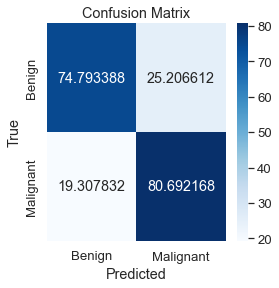

In [96]:
import seaborn as sns

class_names = ['Benign', 'Malignant']  # Replace with your class labels

# Plot the confusion matrix
plt.figure(figsize=(len(class_names)*2, len(class_names)*2))
sns.set(font_scale=1.2)  # Adjust the font size for better visualization
sns.heatmap(confusion_mtx, annot=True, fmt='f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()